# ANN - Example 3

In [9]:
import numpy as np
W = np.array([[0.9, 0.3, 0.4],
            [0.2, 0.8, 0.2],
            [0.1, 0.5, 0.6]])
I = np.array([[0.9],[0.1], [0.8]])

def mySigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
Xih = np.dot(W,I)
Xih

array([[1.16],
       [0.42],
       [0.62]])

In [11]:
Oh = mySigmoid(Xih)
Oh

array([[0.76133271],
       [0.60348325],
       [0.65021855]])

# Creating Class and Methods
A class defines the structure, data and methods that an object will have. There is possible to have public and private variables to operate in the methods.


- Argument
- Initialitation
- Methods
- Destroy

In [5]:
class Dog:
    # init method
    def __init__(self, dogName, dogAge):
        self.name=dogName
        self.age=dogAge
    
    # status method
    def status(self):
        print("The Dogs name is: ", self.name)
        print("The Dogs age is: ", self.age)


In [6]:
perro1=Dog('cuadrado', 9)

In [7]:
perro1.status()

The Dogs name is:  cuadrado
The Dogs age is:  9


In [10]:
print(perro1.name)
print(perro1.age)

cuadrado
9


# The Neural Notwork Class

The next chunk of code defines the Neural Network's basic structure. We are going to implement and define the methods one at tima to understand them in a better way.



In [ ]:
class NeuralNetwork:
    # init method
    def __init__():
        pass
    
    # NN computing method
    def feedforward():
        pass
    
    # NN trainning method    
    def backpropagation():
        pass

## Initialization or creation Method

Let’s begin with the initialization. We know we need to set the number of input, hidden and output layer nodes. That defines the shape and size of the neural network. Thus, we’ll let them be set when a new neural network object is created by using the class' parameters. That way we retain the choice to create new neural networks of different sizes with simple methods.

A good programmers, computer scientists and mathematicians, try to create more general code rather than specific code. It is a good habit, because it forces us to think about solving problems in a deeper and more general way. This means that our code can be used in more general scenarios.

Then, ket us see how our code should look like:

In [11]:
import numpy as np

class NeuralNetwork:
    # init method
    def __init__(self, inputN,hiddenN, outputN, lr):
        # creates a NN with three layers (input, hidden, output)
        # inputN - Number of input nodes
        # hiddenN - Number of hidden nodes
        self.inN=inputN
        self.hiN=hiddenN
        self.outN=outputN
        self.lr=lr
        
        #weight W11 W21 W31
            #   W12 W22 W32
            # .....
        self.wih=np.random.rand(self.hiN, self.inN)
        self.who=np.random.rand(self.outN,self.hiN)
        pass
    
    # NN computing method
    def feedforward():
        pass
    
    # NN trainning method    
    def backpropagation():
        pass

In [12]:
myNN=NeuralNetwork(3,3,3,0.1)

In [18]:
myNN.wih

array([[0.86760733, 0.61494357, 0.16001254],
       [0.86192173, 0.71746821, 0.90211204],
       [0.44345426, 0.66751851, 0.33738905]])

At this point were are only creating an object, but the myNN instance can't do any useful yet. Also, this is a good technique to start coding somethig, by keeping it small at the begining (make commits), and then grow the methods.

Next, we should add more code to allow our NN class finish its initialization by creating the weight matrixes.

## Feedfordward method and weights initialization

So the next step is to create the network of nodes and links. The most important part of the network is the link weights. They’re used to calculate the signal being fed forward, the error as it’s propagated backwards, and it is the link weights themselves that are refined in an attempt to to improve the network.

For the basic NN, the weight matrix consist of:

- A matrix that links the input and hidden layers, $Wih$, of size hidden nodes by input nodes ($hn×in$)
- and another matrix for the links between the hidden and output layers, $Who$, of size $on×hn$ (output nodes by hidden nodes)

$$X_h=W_{ih}I$$
$$O_h=\sigma{X_h}$$

In [87]:
import numpy as np


class NeuralNetwork:
    # init method
    def __init__(self, inputN,hiddenN, outputN, lr):
        # creates a NN with three layers (input, hidden, output)
        # inputN - Number of input nodes
        # hiddenN - Number of hidden nodes
        self.inN=inputN
        self.hiN=hiddenN
        self.outN=outputN
        self.lr=lr
        
        #weight W11 W21 W31
            #   W12 W22 W32
            # .....
        np.random.seed(42)    
        self.wih=np.random.rand(self.hiN, self.inN)
        self.who=np.random.rand(self.outN,self.hiN)
        pass
    
    # NN computing method
    def feedforward(self, inputList):
        # computing hidden output
        inputs = np.array(inputList, ndmin=2).T
        self.Xh = np.dot(self.wih, inputs)
        self.af = lambda x:1/(1+np.exp(-x))
        self.Oh = self.af(self.Xh)
        
        # computing output 
        self.Xo = np.dot(self.who, self.Oh)
        self.Oo = self.af(self.Xo)
        return self.Oo
    
    # NN trainning method    
    def backpropagation():
        pass

In [88]:
myNN=NeuralNetwork(3,5,3,0.3)

At this point we can review the variables or class attributes by calling them:

In [89]:
myNN.wih

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497]])

In [90]:
myNN.feedforward([0.3, 0.2, 0.1])

array([[0.72922423],
       [0.74638741],
       [0.77466214]])

In [91]:
myNN.Oh

array([[0.59283661],
       [0.55635965],
       [0.56236646],
       [0.57774658],
       [0.57697877]])

In [92]:
myNN.Xh

array([[0.37570429],
       [0.22640073],
       [0.25077181],
       [0.31352966],
       [0.31038311]])

In [77]:
myNN.Oo

array([0.72644667, 0.6712605 , 0.63947874])

## The backpropagation and trainning method

$$ \frac{\partial E}{\partial w_{jk}}= -e_j\cdot \sigma\left(\sum_i w_{ij} o_i\right) \left(1-\sigma\left(\sum_i w_{ij} o_i\right) \right) o_i $$

In [2]:
import numpy as np


class NeuralNetwork:
    # init method
    def __init__(self, inputN,hiddenN, outputN, lr):
        # creates a NN with three layers (input, hidden, output)
        # inputN - Number of input nodes
        # hiddenN - Number of hidden nodes
        self.inN=inputN
        self.hiN=hiddenN
        self.outN=outputN
        self.lr=lr
        
        #weight W11 W21 W31
            #   W12 W22 W32
            # .....
        np.random.seed(40)    
        self.wih=np.random.rand(self.hiN, self.inN)-0.5
        self.who=np.random.rand(self.outN,self.hiN)-0.5
        pass
    
    # NN computing method
    def feedforward(self, inputList):
        # computing hidden output
        inputs = np.array(inputList, ndmin=2).T
        self.Xh = np.dot(self.wih, inputs)
        self.af = lambda x:1/(1+np.exp(-x))
        self.Oh = self.af(self.Xh)
        
        # computing output 
        self.Xo = np.dot(self.who, self.Oh)
        self.Oo = self.af(self.Xo)
        return self.Oo
    
    # NN trainning method    
    def backpropagation(self, inputList, targetList):
        # data
        lr = self.lr 
        inputs = np.array(inputList, ndmin=2).T
        target = np.array(targetList, ndmin=2).T
        
        #computting hidden layer
        Xh = np.dot(self.wih, inputs)
        af = lambda x:1/(1+np.exp(-x))
        Oh = af(Xh)
        
        # computing output 
        Xo = np.dot(self.who, Oh)
        Oo = af(Xo)
        
        # Output error
        oe = target-Oo
        # E propagation
        hiddenE = np.dot(self.who.T, oe)
        
        # updating weights
        self.who+=lr*np.dot(oe*Oo*(1-Oo), Oh.T) 
        self.wih+=lr*np.dot(hiddenE*Oh*(1-Oh), inputs.T) 
        return self.wih, self.who

## Exam

In [3]:
NN3 = NeuralNetwork(3,3,3,0.15)

In [4]:
NN3.wih

array([[-0.09231297, -0.44463396,  0.28853488],
       [-0.21269482, -0.04964941, -0.19608769],
       [ 0.02639952,  0.12381221,  0.27677546]])

In [5]:
NN3.who

array([[ 0.18624165,  0.48093886,  0.10081609],
       [ 0.31396852,  0.20864515, -0.47246532],
       [ 0.40426722, -0.05009515, -0.38107535]])

## First Feed

In [6]:
NN3.feedforward([0.43, 0.88, 0.95])

array([[0.58611654],
       [0.48786288],
       [0.4846667 ]])

In [7]:
NN3.backpropagation([0.43, 0.88, 0.95], [0.25, 0.7, 0.1])

(array([[-0.09474099, -0.44960292,  0.28317066],
        [-0.21423683, -0.05280516, -0.19949447],
        [ 0.02659345,  0.12420909,  0.2772039 ]]),
 array([[ 0.18060506,  0.47579807,  0.09354318],
        [ 0.3176326 ,  0.21198694, -0.46773754],
        [ 0.3976255 , -0.05615266, -0.38964518]]))

## Second feed

In [46]:
NN3.feedforward([0.47, 0.07, 0.64])

array([[0.4262625 ],
       [0.50988177],
       [0.52984418]])

In [47]:
NN3.backpropagation([0.47, 0.07, 0.64], [0.17, 0.67, 0.14])

(array([[ 0.34418188,  0.05427654, -0.04100328],
        [-0.14923924,  0.08653238,  0.03279852],
        [ 0.32666948, -0.23622231, -0.02194774],
        [-0.15480446, -0.36651948, -0.24284465]]),
 array([[-0.44498126, -0.09860092, -0.12175549,  0.0634736 ],
        [ 0.39189539, -0.33801846, -0.09787605,  0.14729404],
        [ 0.04218888,  0.0429173 , -0.00094672,  0.08642189]]))

## Third feed

## Fourth feed

## Fifth feed

# MNIST Dataset

Reading the complete file

In [2]:
data_file= open("mnist_train.csv", 'r')
data_list= data_file.readlines()
data_file.close()

## Interpreting one intrance

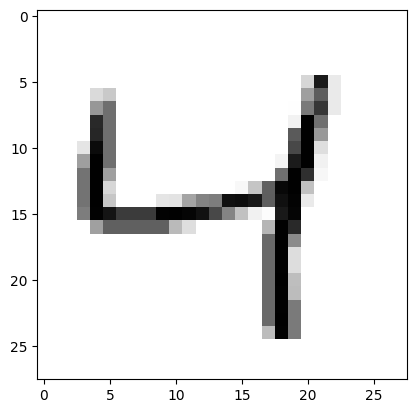

In [4]:
import numpy as np
import matplotlib.pyplot as plt
all_values= data_list[2].split(',')
image_array= np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

## What the NN sees?

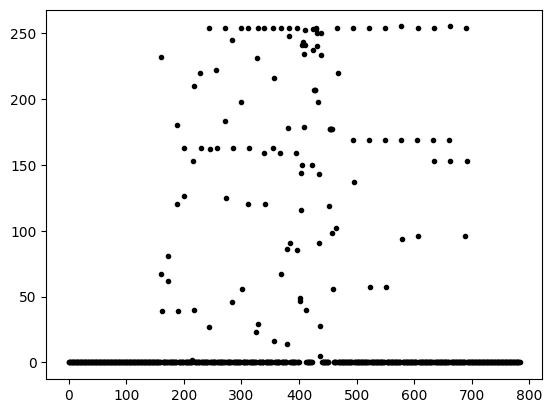

In [23]:
plt.plot(np.asfarray(all_values[1:]), '.k')

## Trainning a NN for MNIST dataset

In [34]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn1 = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [35]:
# epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn1.backpropagation(inputs, targets)
        pass
    pass

In [26]:
all_values[0]

'4'

In [ ]:
targets

## Testing the trinning NN

In [29]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

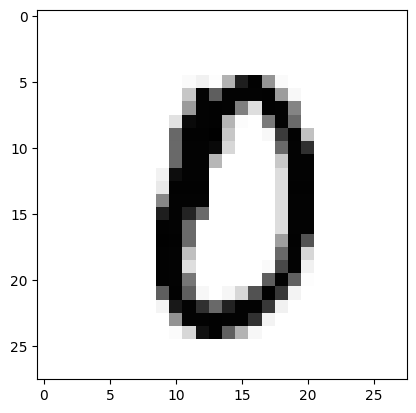

In [30]:
all_values= test_data_list[55].split(',')
image_array= np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',interpolation='None')

In [31]:
nn1.feedforward((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [32]:
nn1.who

array([[0.18726904, 0.08814464, 0.76482022, ..., 0.70586941, 0.1568063 ,
        0.4999693 ],
       [0.53312775, 0.84159698, 0.45797607, ..., 0.71989791, 0.67931778,
        0.83039971],
       [0.99283059, 0.35872355, 0.15924308, ..., 0.62648659, 0.97066054,
        0.03276188],
       ...,
       [0.6879452 , 0.26462095, 0.17300758, ..., 0.02829032, 0.16182483,
        0.45969922],
       [0.17684306, 0.41909022, 0.21317277, ..., 0.34570399, 0.96639186,
        0.71681652],
       [0.45144587, 0.8926533 , 0.41438135, ..., 0.75578523, 0.88247098,
        0.8760342 ]])